In [104]:
pip install xgboost==0.90

Processing /Users/shinemohammed/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb/xgboost-0.90-cp37-cp37m-macosx_10_9_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf

import xgboost


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
xgb.__version__


'0.90'

In [3]:
data = pd.read_csv("./cardio_train.csv", sep = ";", engine = "python")



In [4]:
df = data.copy()

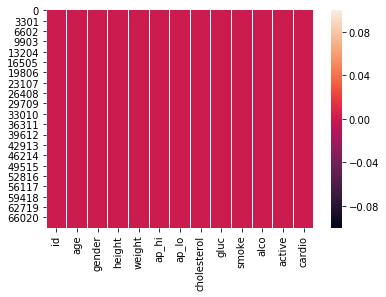

In [5]:
sns.heatmap(df.isna())

# Data Preprocessing

In [6]:
def preprocess(df):
    df.drop(["id"], inplace = True, axis = 1)
    df["age"] = df["age"].div(365)
    df[df["gender"] == 2] = 0
    df["height"] = df["height"].div(100)
    return df

In [7]:
df = data.copy()
df = preprocess(df)

In [8]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,1.55,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,1.63,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,1.65,70.0,120,80,1,1,0,0,1,0
3,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
4,64.090411,1,1.55,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
69297,61.920548,1,1.58,126.0,140,90,2,2,0,0,1,1
69298,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
69299,61.454795,1,1.63,72.0,135,80,1,2,0,0,0,1


# Train test Split 

In [79]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model 1: XGBclassifier(random)

In [89]:
import joblib
classifier1 = joblib.load("xgbclassifier_random")

In [90]:
y_pred = classifier1.predict(X_test)

In [91]:
#loading the model
accuracy_score(y_test, y_pred)

0.8277180578601833

In [92]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(8356, 1056, 1332, 3117)

# Model 1: XGBclassifier

In [93]:
#loading the model
classifier2 = joblib.load("xgbclassifier")

In [94]:
y_pred = classifier2.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred)

0.8293052449318231

In [96]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(8381, 1031, 1335, 3114)

In [97]:
y_test.sum()

4449

In [102]:
import joblib
#save model
joblib.dump(classifier1, "xgbclassifier")

['xgbclassifier']